# 1. DATA UNDERSANDING

In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [513]:
#importing the dataset
df= pd.read_csv("E:\\CLSS_1\\NLP\\assignment\\train.csv")

In [514]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [515]:
#seeing the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [516]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [517]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [518]:
df.shape

(1460, 81)

Inference:
    1. The data seems to have quite a number of missing values 
    2. Majority of the columns are categorical type

# 2. EDA

Missing Value Imputation

In [519]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum())/(df.isna().count()).sort_values(ascending=False)



In [520]:
percent

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [521]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [522]:
percent[percent>0].sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtFinType1    0.025342
BsmtCond        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [523]:
type_df = df.dtypes

In [524]:
num_train = type_df[(type_df == 'int64') | (type_df == 'float')]
num_train

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [525]:
cat_train = type_df[(type_df == 'object')]
cat_train

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [526]:
numerical_values_train = list(num_train.index)
numerical_values_train

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [527]:
categorical_values_train = list(cat_train.index)
categorical_values_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [528]:
# Replacing the null values for these categorical variables by 'NA' 
cat_type1 = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond'
       ,'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']
for col in cat_type1:
    df[col].replace(np.NaN,'NA',inplace=True)

In [529]:
# Replacing null values with mean for numerical variables
num_type1 = ['LotFrontage','MasVnrArea']

for col in num_type1:
    df[col].replace(np.NaN,df[col].mean(),inplace=True)
    


In [530]:
# Replacing null values with mode for categorical variables
cat_type2 = ['GarageYrBlt','Electrical']

   
for col in cat_type2:
    df[col].replace(np.NaN,df[col].mode()[0],inplace=True)

In [531]:
#checking for nullvalues
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum())/(df.isna().count()).sort_values(ascending=False)
percent[percent>0].sort_values(ascending = False)


Series([], dtype: float64)

In [532]:
#dropping coluns with more than 70% NA
df.drop(['PoolQC','MiscFeature', 'Alley', 'Fence'], axis=1,inplace=True )

In [533]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


DATA VISUALIZATION

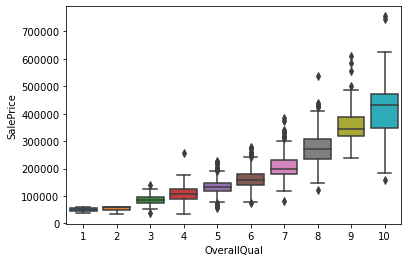

In [534]:
sns.boxplot(x="OverallQual", y="SalePrice", data=df)

INFRENCE:
   1. The plot defines we can state that as OverallQual increases, the SalePrice also increases.
   2. The above assumption is true on normal assumption also, As OverallQual is more the SalePrice is also more.

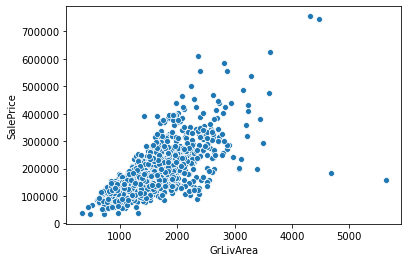

In [535]:
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)

People pay more for more living area.

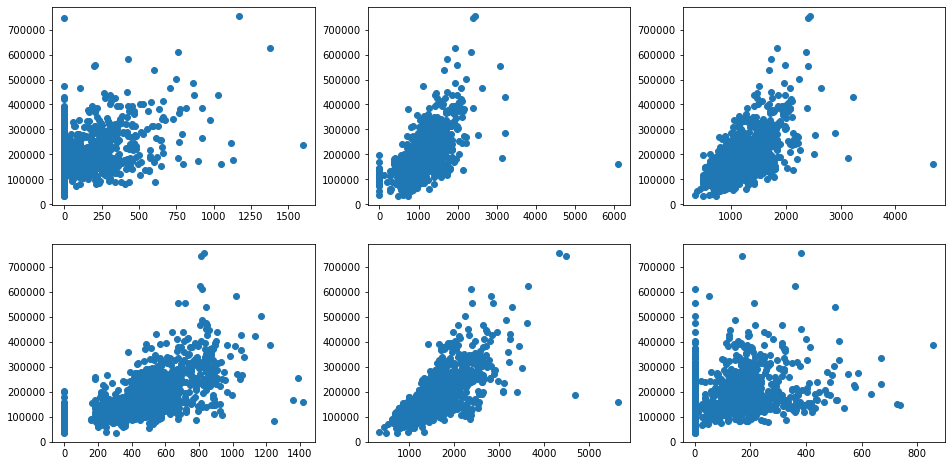

In [536]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df['MasVnrArea'],df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df['TotalBsmtSF'],df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)

The above plots give us a fair understanding and layout of the variables

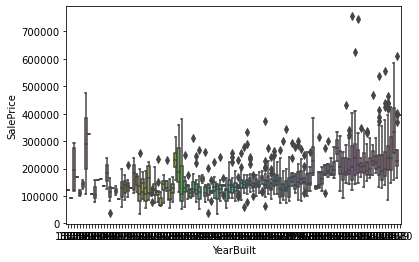

In [537]:
sns.boxplot(x="YearBuilt", y="SalePrice", data=df)

Even we see as the building ages the cost is both increasing and decreasing. Our assumption was if the building cost is less for a big house, it might be because it was old. But now even if the building is old, The cost seems to be high

In [538]:
corrmat = df.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


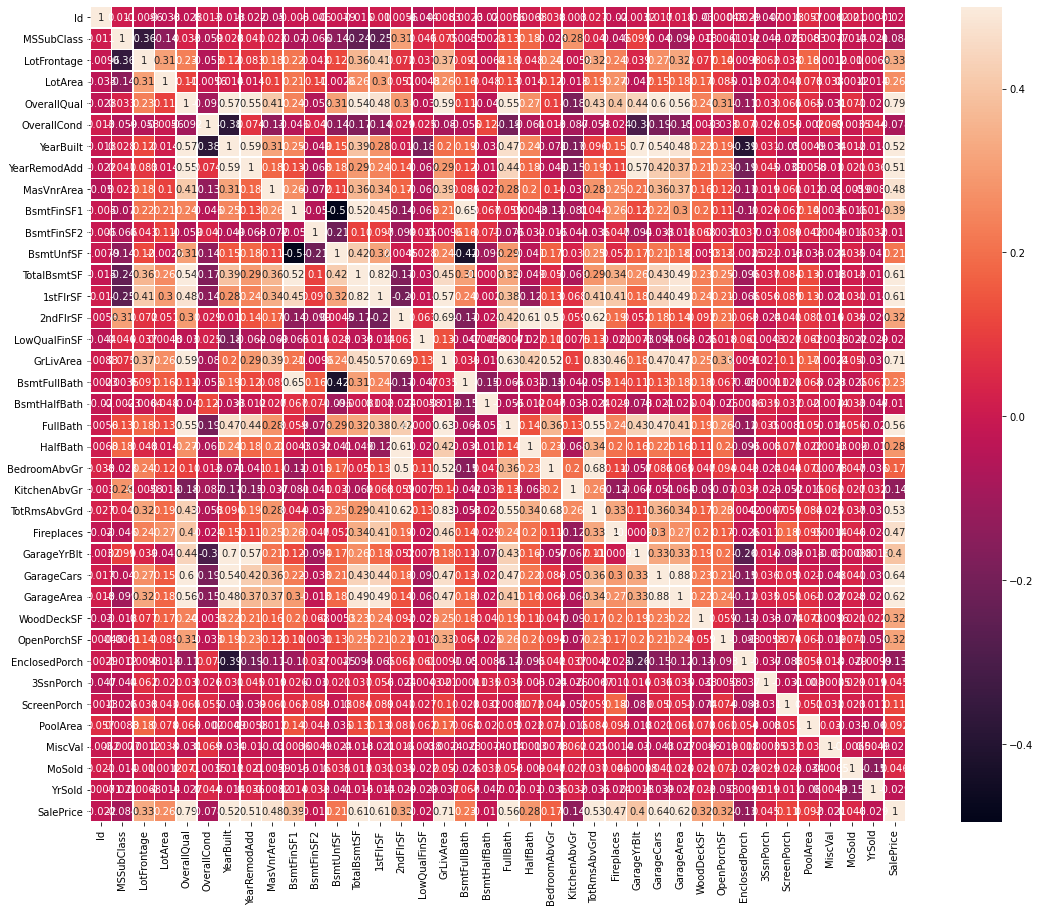

In [539]:
plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, vmax=0.5, square=True, linewidths=.5, annot=True);

A significant high correlation is observed between Year Built and Garage Year Built, Overall Quantity and Sales Price etc. however reading this heatmap can be tedious

Plotting for Categorical variables

In [540]:
df_categorical = df.select_dtypes(exclude=['float64','int64'])
df_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [541]:
# Function to plot multiple bar charts by counts
def count_plot(r,c,columns,rot=45):
    for i,col in zip(range(1,(r*c)+1),columns):
        plt.subplot(r,c,i)
        plt.title('Distribution of Catgeories in '+col+ ' Feature',size=10,color='Green')
        sns.countplot(x=col,data=df)
        plt.xticks(rotation=rot)
        plt.tight_layout(pad=1.0)

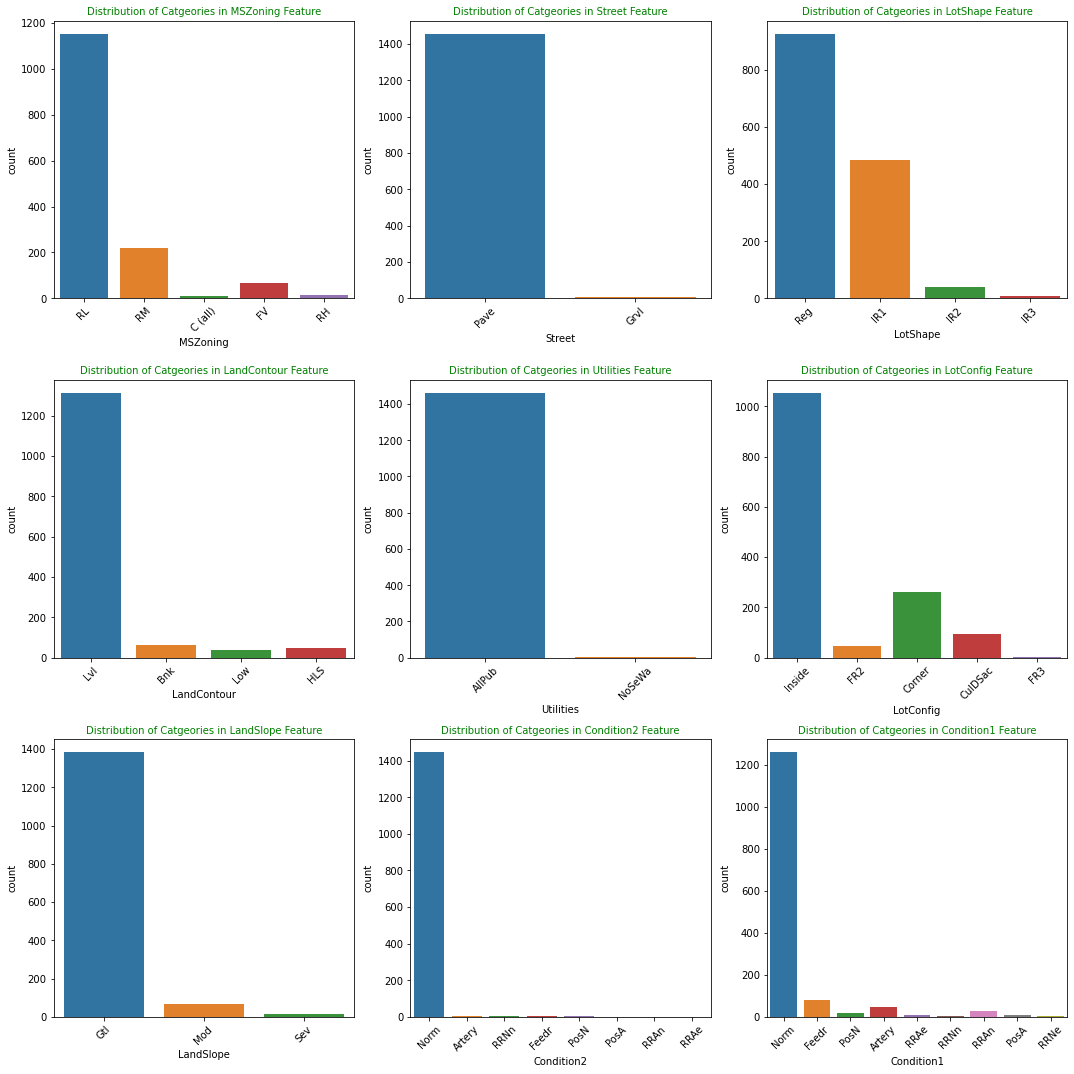

In [542]:
Categorical1=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition2', 'Condition1']
plt.figure(figsize=(15,15))
count_plot(3,3,Categorical1)

We are dropping categorical variables which are highly skewed

In [543]:
# Dropping skewed variables
df.drop(['Street','Utilities','LandSlope','Condition2'],axis=1,inplace=True)

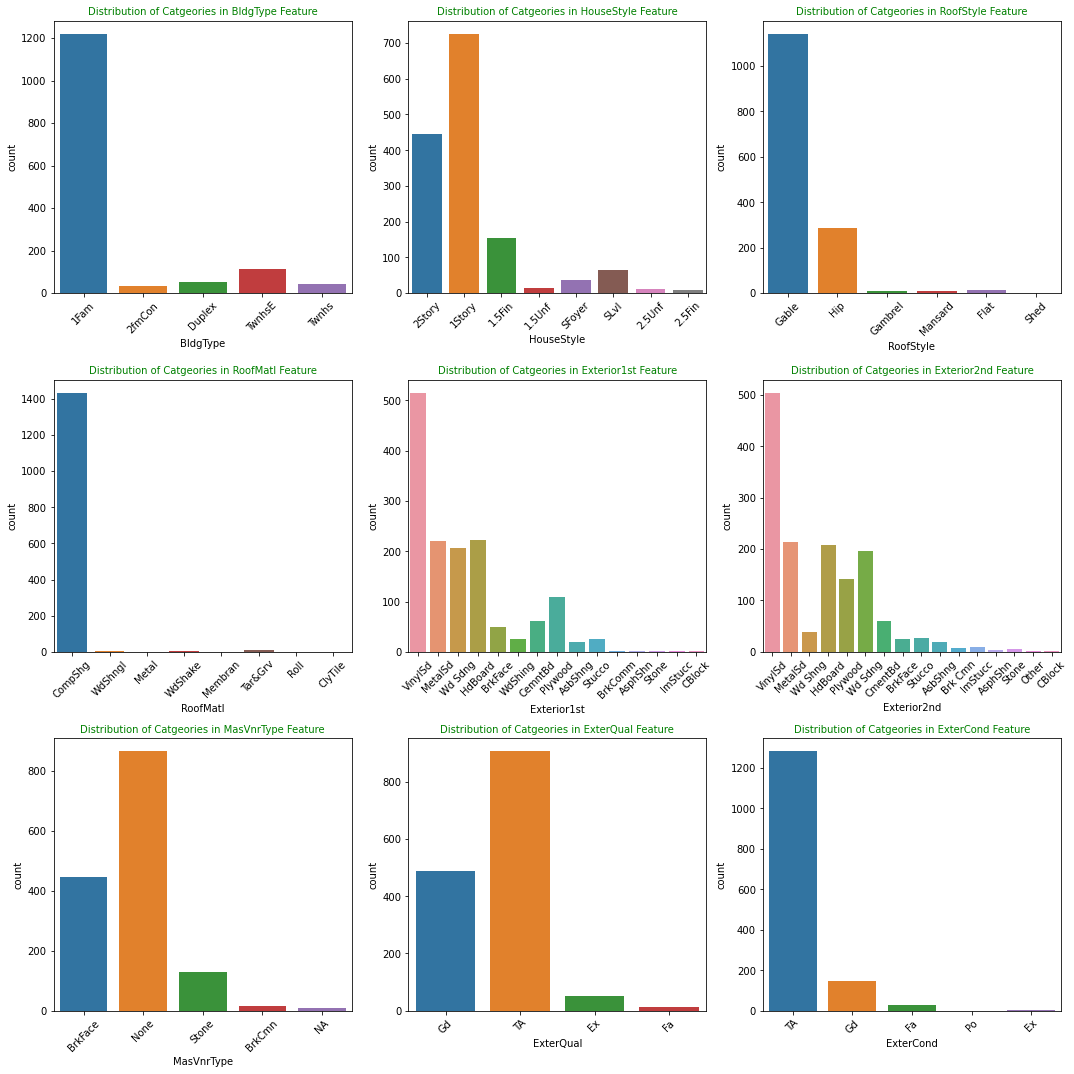

In [544]:
categorical2=['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond']
plt.figure(figsize=(15,15))
count_plot(3,3,categorical2)

In [545]:
# Dropping skewed variables
df.drop(['RoofMatl'],axis=1,inplace=True)

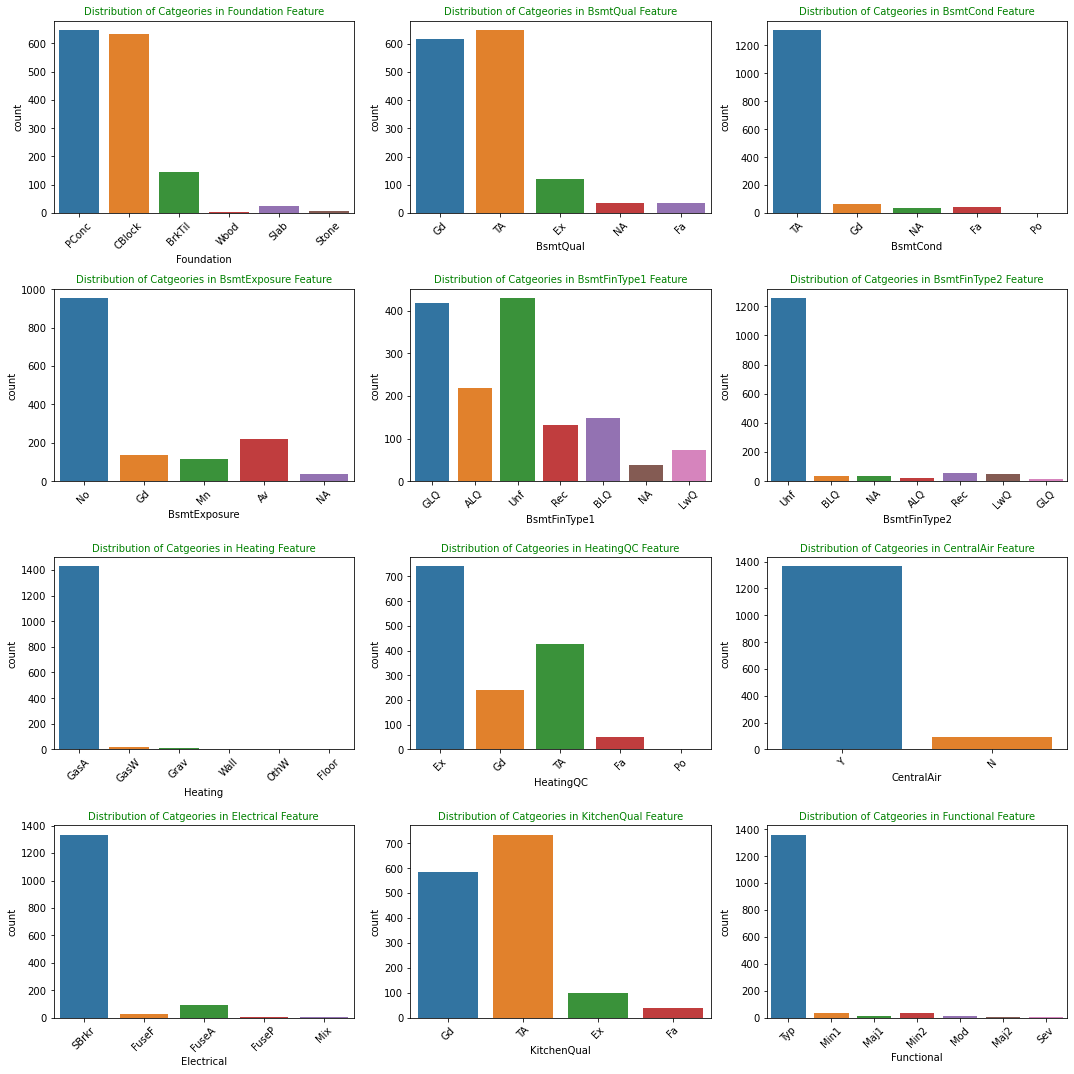

In [546]:
categorical3=['Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional']
plt.figure(figsize=(15,15))
count_plot(4,3,categorical3)

In [547]:
# Dropping skewed variables
df.drop(['Heating'],axis=1,inplace=True)

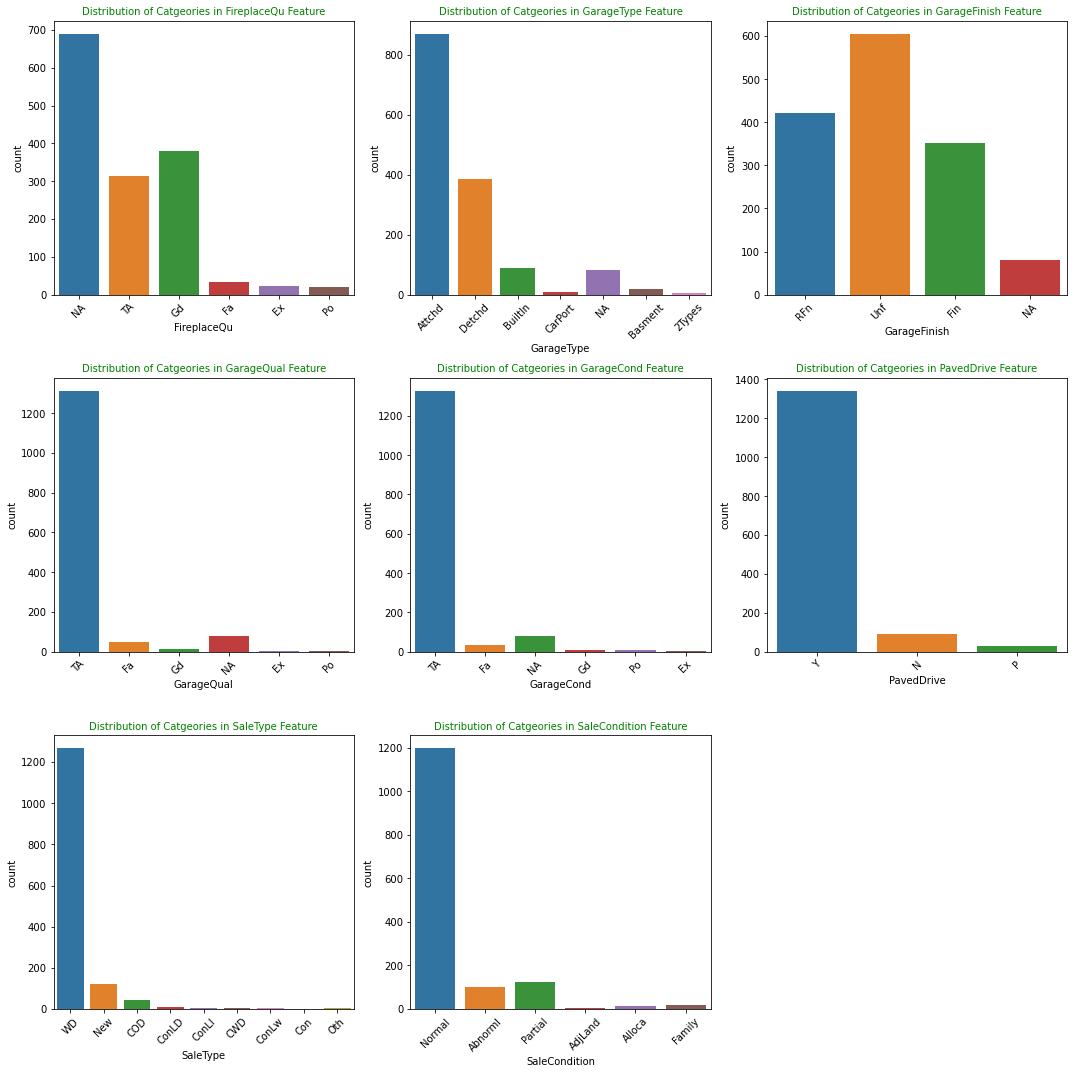

In [548]:
categorical4=['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
plt.figure(figsize=(15,15))
count_plot(3,3,categorical4) 

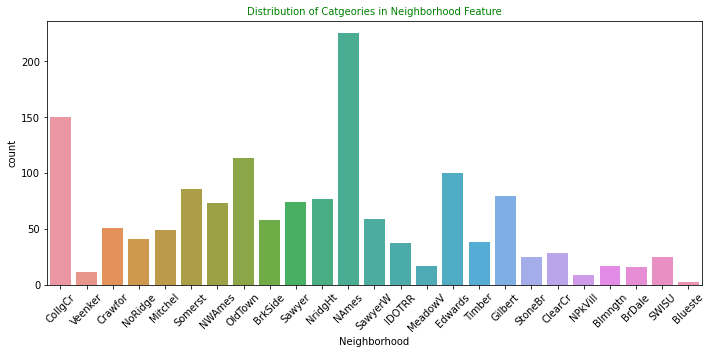

In [549]:
plt.figure(figsize=(10,5))
count_plot(1,1,['Neighborhood'])

Plotting for Numerical variables

In [550]:
numerical_values_train

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [551]:
# ID is not a useful variable and can be dropped
df.drop(['Id'],axis=1,inplace=True)

 we will try to convert the Year columns with the age where we are going to fill these columns with number

In [552]:
df['YearBuilt_Old'] = df.YearBuilt.max()-df.YearBuilt
df['YearRemodAdd_Old'] = df.YearRemodAdd.max()-df.YearRemodAdd
df['GarageYrBlt_Old'] = df.GarageYrBlt.max()-df.GarageYrBlt
df['YrSold_Old'] = df.YrSold.max()-df.YrSold
df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
878,1961,1995,1987.0,2010,49,15,23.0,0
481,2003,2004,2003.0,2006,7,6,7.0,4
1283,1971,1971,2005.0,2010,39,39,5.0,0
13,2006,2007,2006.0,2007,4,3,4.0,3
1108,2000,2000,2000.0,2007,10,10,10.0,3
1243,2006,2006,2006.0,2006,4,4,4.0,4
636,1936,1950,2005.0,2009,74,60,5.0,1
1,1976,1976,1976.0,2007,34,34,34.0,3
1091,1999,2000,1999.0,2008,11,10,11.0,2
934,1960,2007,1960.0,2008,50,3,50.0,2


In [553]:
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

In [554]:
df_numerical = df.select_dtypes(exclude=['object'])

In [555]:
df_numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'YearBuilt_Old', 'YearRemodAdd_Old',
       'GarageYrBlt_Old', 'YrSold_Old'],
      dtype='object')

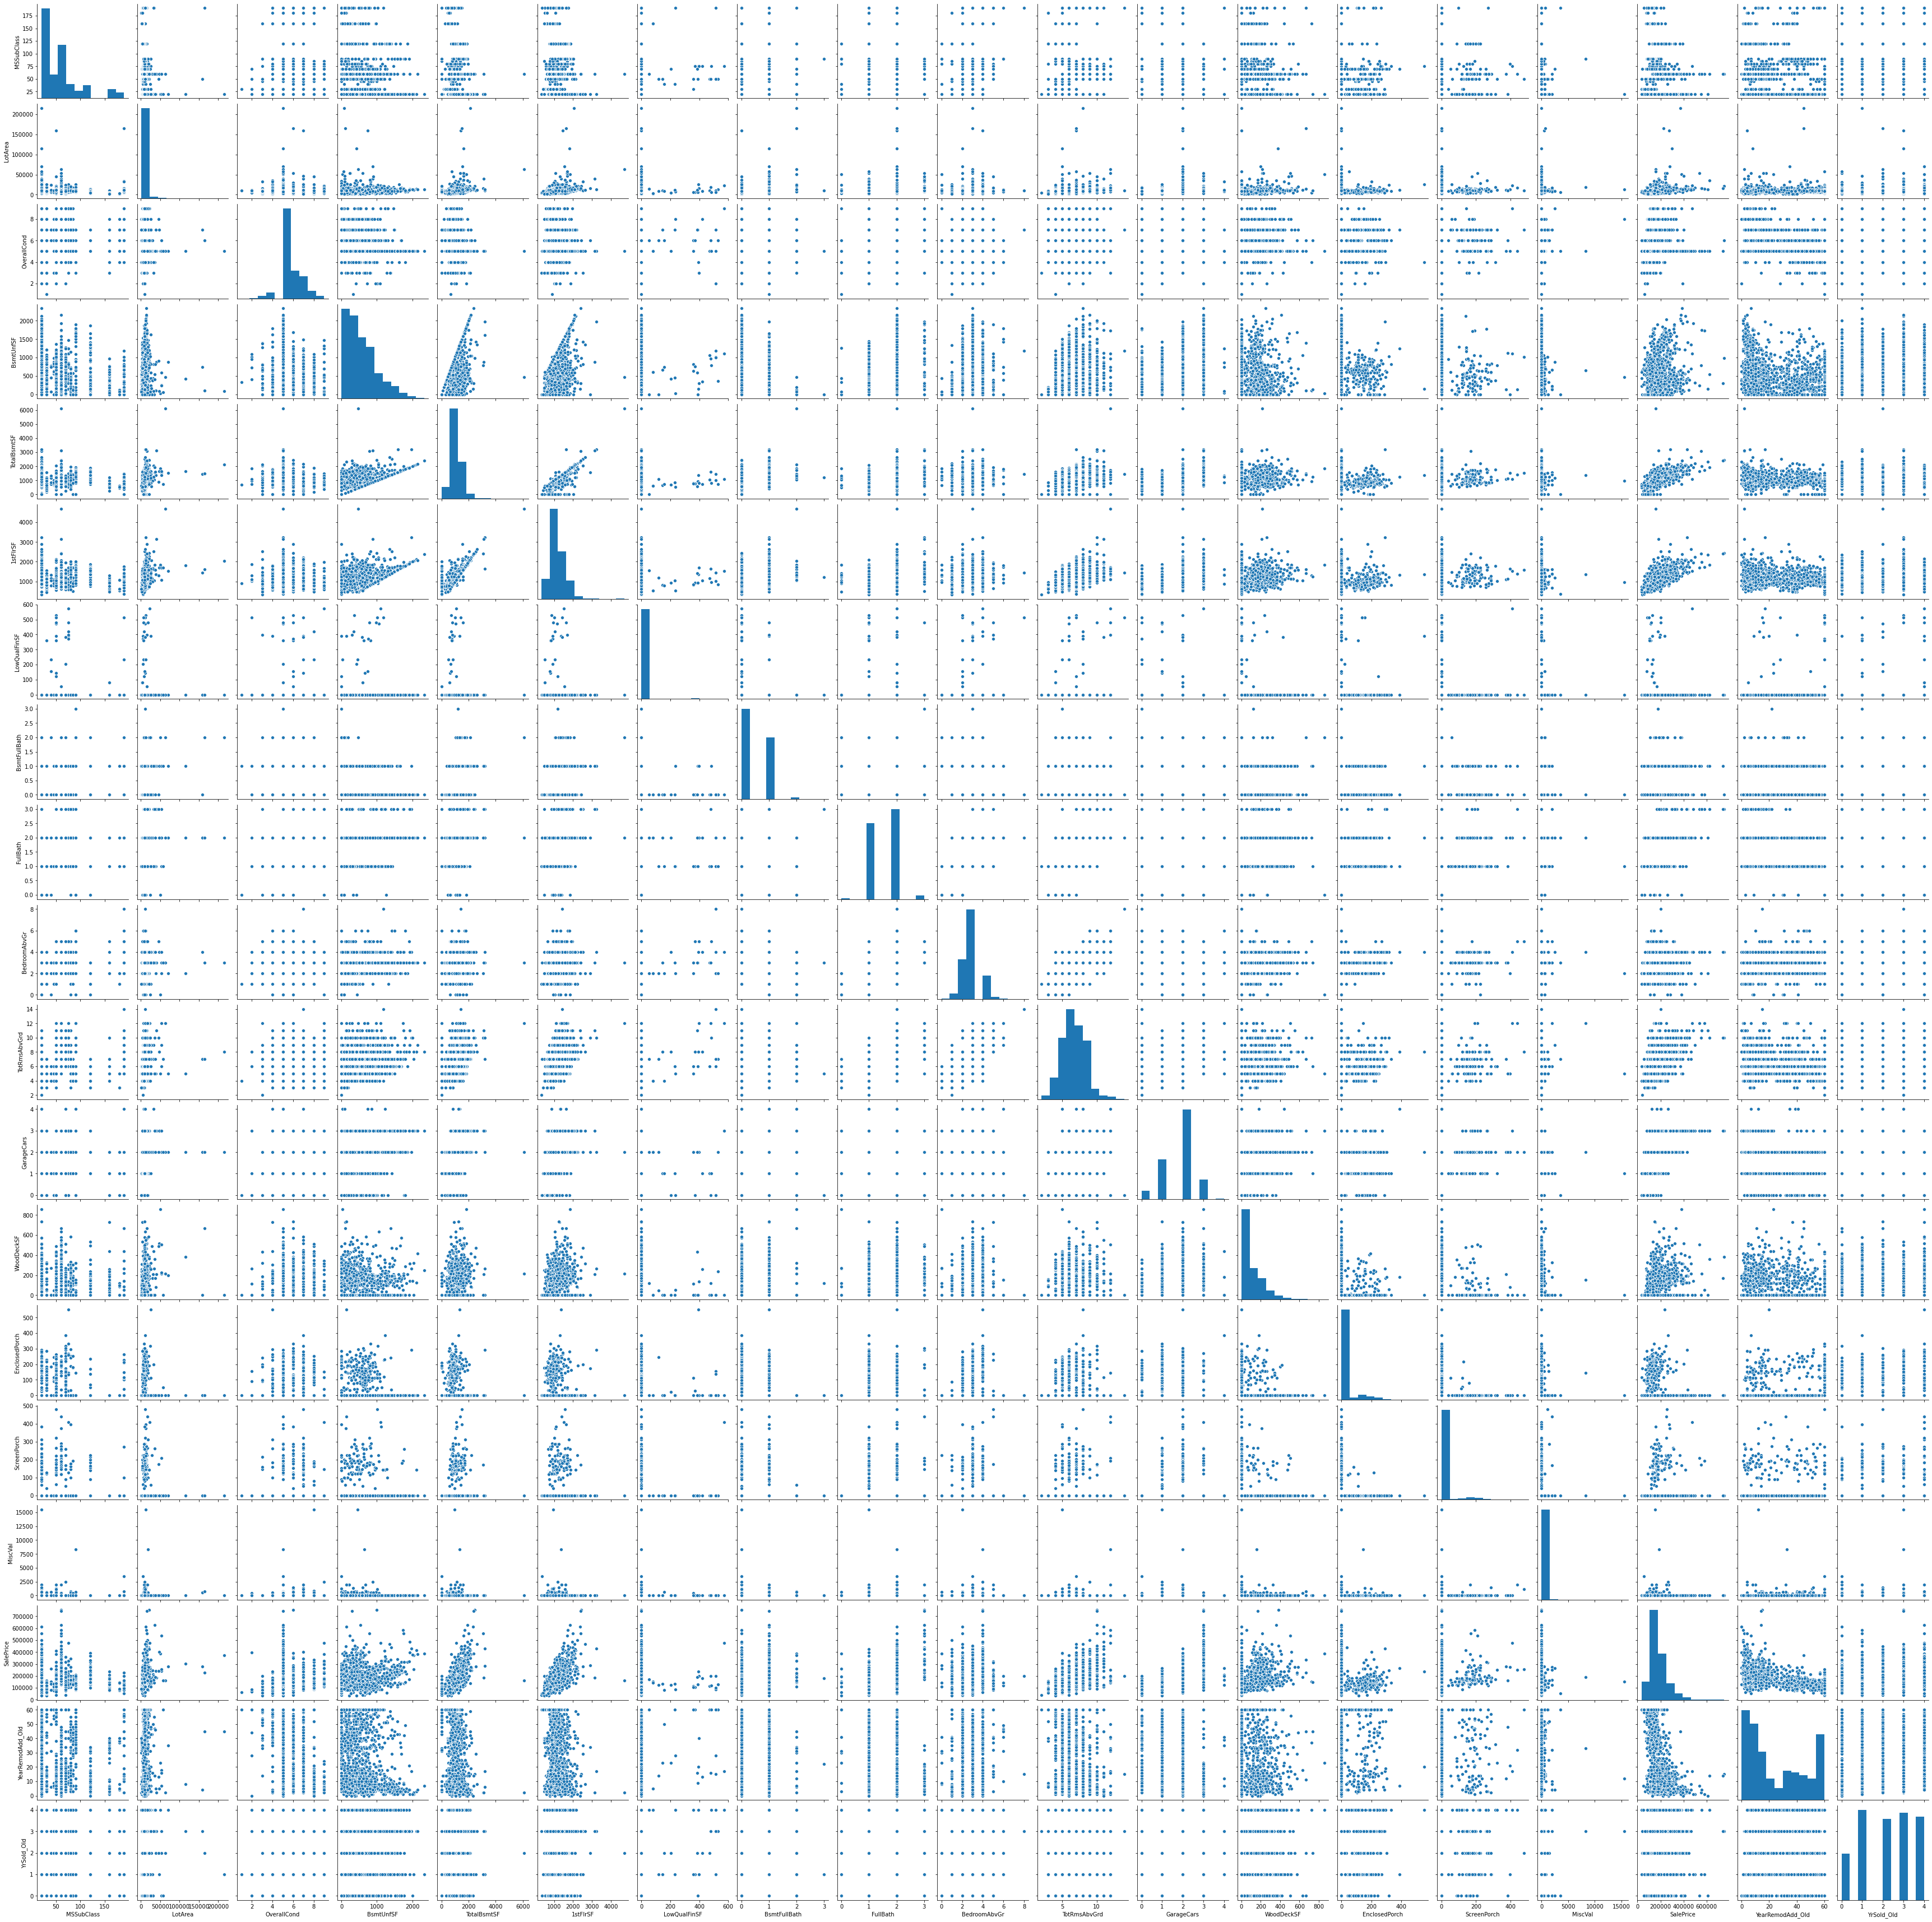

In [556]:
cols= ['MSSubClass', 'LotArea', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch',
       'MiscVal', 'SalePrice', 'YearRemodAdd_Old', 'YrSold_Old']
sns.pairplot(df[cols],size=2.5);

In [557]:
# Removing the following categorical variables from the list
cat_cols = ['MSSubClass','MoSold','BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd','Fireplaces','GarageCars','OverallQual','OverallCond']
df_numerical.drop(cat_cols,axis=1,inplace=True)

In [558]:
df_numerical.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
       'YearBuilt_Old', 'YearRemodAdd_Old', 'GarageYrBlt_Old', 'YrSold_Old'],
      dtype='object')

Target Variable evluation

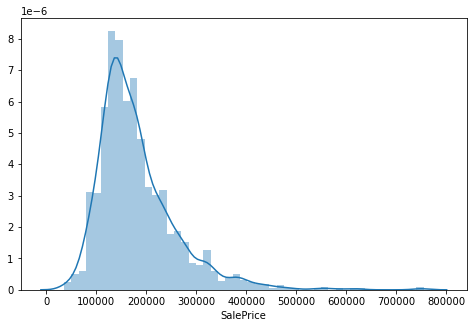

In [559]:
plt.figure(figsize=(8,5))
sns.distplot(df['SalePrice'])


Inference

The variable is normally distributed 

But is skewed toward the left as housing is very expensive

We can use log transform to treat the skewedness

In [560]:
from scipy import stats
df['SalePrice'].skew()

1.8828757597682129

In [561]:
df['SalePrice'].kurtosis()

6.536281860064529

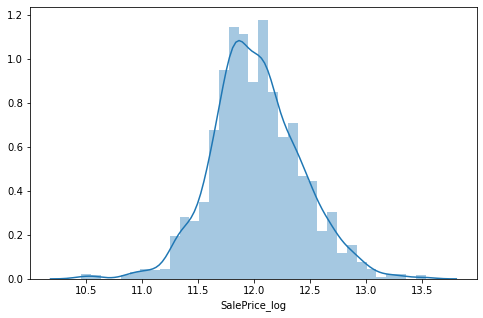

In [562]:
df['SalePrice_log'] = np.log(df['SalePrice'])
plt.figure(figsize=(8,5))
sns.distplot(df.SalePrice_log)

The skewness now seems to be adjusted

In [563]:
#Dropping the old skewed sal price 
df.drop(['SalePrice'],axis=1,inplace=True)

Dummy Creation

In [564]:
# Updates et of categorical variables
df_categorical = df.select_dtypes(exclude=['float64','int64'])
df_categorical.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [565]:
dummy1 = pd.get_dummies(df[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition','MSSubClass','MoSold','BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd','Fireplaces','GarageCars']], drop_first=True)

In [566]:
#including output to main dataframe
df1 = pd.concat([df, dummy1], axis=1)

df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,0,0,0,0,1,0,0,0,1,0


In [567]:
## Dropping the columns for whom dummy variables have been created

col = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition','MSSubClass','MoSold','BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd','Fireplaces','GarageCars']
df1.drop(col,axis=1,inplace=True)
df1.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=214)

# TEST TRAIN SPLIT

In [568]:
from sklearn.model_selection import train_test_split

In [569]:

X = df1.drop(['SalePrice_log'], axis=1)

X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [570]:
#  response variable to y
y = df1['SalePrice_log']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_log, dtype: float64

In [571]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3,random_state=0)

Scaling

In [572]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

array([[ 0.01436782,  2.14842582, -0.05771627, ..., -0.10436038,
        -2.19870092, -0.29551133],
       [ 0.44404029, -0.10417397, -0.05771627, ..., -0.10436038,
         0.45481402, -0.29551133],
       [ 0.01436782, -0.34471174, -0.7943202 , ..., -0.10436038,
         0.45481402, -0.29551133],
       ...,
       [ 1.02013478, -0.0121379 ,  1.41549158, ..., -0.10436038,
         0.45481402, -0.29551133],
       [-0.1320542 , -0.07326851,  0.67888765, ..., -0.10436038,
         0.45481402, -0.29551133],
       [ 1.45220565,  0.22908018,  2.1520955 , ..., -0.10436038,
        -2.19870092,  3.38396506]])

# 3. MODEL BUILDING

In [573]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [574]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=50
         )             
rfe = rfe.fit(X_train, y_train)

In [575]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 149),
 ('LotArea', False, 163),
 ('OverallQual', True, 1),
 ('OverallCond', False, 90),
 ('MasVnrArea', False, 161),
 ('BsmtFinSF1', False, 142),
 ('BsmtFinSF2', False, 141),
 ('BsmtUnfSF', False, 146),
 ('TotalBsmtSF', False, 140),
 ('1stFlrSF', False, 144),
 ('2ndFlrSF', False, 145),
 ('LowQualFinSF', False, 143),
 ('GrLivArea', False, 139),
 ('GarageArea', False, 154),
 ('WoodDeckSF', False, 156),
 ('OpenPorchSF', False, 158),
 ('EnclosedPorch', False, 159),
 ('3SsnPorch', False, 157),
 ('ScreenPorch', False, 151),
 ('PoolArea', False, 152),
 ('MiscVal', False, 162),
 ('YearBuilt_Old', False, 138),
 ('YearRemodAdd_Old', False, 147),
 ('GarageYrBlt_Old', False, 150),
 ('YrSold_Old', False, 121),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', True, 1),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 108),
 ('LandContour_HLS', False, 92),
 ('LandContour_Low', False, 103),
 ('Land

In [576]:
# Storing the relevant 50 columns post RFE
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_MetalSd', 'Exterior1st_Stone',
       'Exterior2nd_CBlock', 'Exterior2nd_MetalSd', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'ExterCond_Fa', 'ExterCond_Po',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_NA', 'BsmtQual_TA', 'BsmtCond_NA', 'BsmtExposure_Gd',
       'BsmtFinType1_NA', 'CentralAir_Y', 'Electrical_FuseF',
       'Electrical_FuseP', 'Functional_Maj2', 'FireplaceQu_NA',
       'GarageType_NA', 'GarageQual_Fa', 'SaleType_CWD', 'SaleType_ConLD',
       

In [577]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [578]:
# Associate the new 50 columns to X_train and X_test 

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Ridge and Lasso Regression

# RIDGE REGRESSION

In [579]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [580]:
print(ridge_model_cv.best_params_)

{'alpha': 0.2}


In [581]:
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.12551237  0.56576347  0.44641634  0.50232653  0.41575501  0.12096231
  0.08786846  0.16014273  0.15964026  0.29406215  0.15457318  0.19361975
  0.14058368  0.09671792 -0.1956332  -0.17419362  0.308545    0.11384047
 -0.1020594  -0.53419028  0.11305645  0.1140421   0.17423581 -0.07456985
 -0.12623271  0.09434671 -0.11948513 -0.13358363 -0.10398051  0.30814953
  0.1473237  -0.22682412 -0.11537349 -0.1149046  -0.23129299 -0.1149046
  0.09596578 -0.1149046   0.13684137 -0.10889406 -0.21705971 -0.43055029
 -0.09936022 -0.15586445 -0.13600065  0.18086818  0.28935597 -0.09348569
  0.2760654  -0.18045756]


In [582]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000698,0.001396,0.003128,0.006255,0.0001,{'alpha': 0.0001},-0.139203,-0.128317,-0.131304,-0.121243,...,-0.131450,0.006434,6,-0.118611,-0.121710,-0.120294,-0.123110,-0.117548,-0.120254,0.002015
1,0.012908,0.006479,0.004425,0.006822,0.001,{'alpha': 0.001},-0.139198,-0.128313,-0.131308,-0.121242,...,-0.131448,0.006433,5,-0.118612,-0.121711,-0.120296,-0.123112,-0.117550,-0.120256,0.002015
2,0.012195,0.002639,0.007394,0.000489,0.01,{'alpha': 0.01},-0.139147,-0.128278,-0.131349,-0.121233,...,-0.131436,0.006425,4,-0.118621,-0.121720,-0.120315,-0.123135,-0.117572,-0.120273,0.002015
3,0.011791,0.004857,0.000800,0.001601,0.1,{'alpha': 0.1},-0.138711,-0.127950,-0.131734,-0.121148,...,-0.131326,0.006370,2,-0.118866,-0.121805,-0.120557,-0.123352,-0.117850,-0.120486,0.001977
4,0.003928,0.006052,0.000000,0.000000,0.2,{'alpha': 0.2},-0.138316,-0.127998,-0.132124,-0.121034,...,-0.131321,0.006328,1,-0.119221,-0.121928,-0.120811,-0.123592,-0.118194,-0.120749,0.001915


In [583]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.2,-0.120749,-0.131321,1
3,0.1,-0.120486,-0.131326,2
5,0.3,-0.120990,-0.131392,3
2,0.01,-0.120273,-0.131436,4
1,0.001,-0.120256,-0.131448,5
0,0.0001,-0.120254,-0.131450,6
6,0.4,-0.121203,-0.131455,7
7,0.5,-0.121414,-0.131528,8
8,0.6,-0.121608,-0.131598,9
9,0.7,-0.121788,-0.131659,10


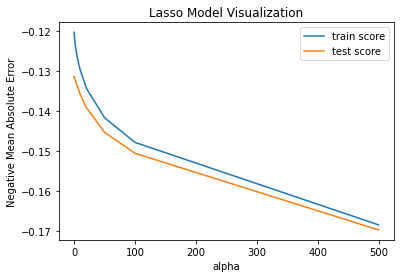

In [584]:
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float32')

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Lasso Model Visualization")
plt.legend(['train score','test score'], loc='best')
plt.show();

In [585]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 using training data is {}".format(r2_train_lr))

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 using test data is {}".format(r2_test_lr))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss using training data is {}".format(rss1_lr))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss using test data is {}".format(rss2_lr))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse using test data is {}".format(mse_train_lr))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse using test data is {}".format(mse_test_lr))

# Building list of all metrics
metric2 = []
metric2.append(r2_train_lr)
metric2.append(r2_test_lr)
metric2.append(rss1_lr)
metric2.append(rss2_lr)
metric2.append(mse_train_lr)
metric2.append(mse_train_lr)

r2 using training data is 0.8383849803161181
r2 using test data is 0.7750394651439148
rss using training data is 26.672079517352536
rss using test data is 15.224401504760511
mse using test data is 0.026123486304948616
mse using test data is 0.03475890754511532


# LASSO REGRESSION

In [586]:
# Lasso

lasso = Lasso()
lasso_model_cv = GridSearchCV(estimator=lasso,
                             param_grid=params,
                             scoring='neg_mean_absolute_error',
                             cv=5,
                             return_train_score=True)
lasso_model_cv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [587]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [588]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [589]:
lasso.coef_

array([ 0.12766964,  0.55051503,  0.4311309 ,  0.48842253,  0.39977911,
        0.12118204,  0.06520434,  0.1534925 ,  0.15821727,  0.28930668,
        0.14909197,  0.18573431,  0.12626098,  0.09325542, -0.19362965,
       -0.17094532,  0.29893659,  0.09492588, -0.09633196, -0.54170523,
        0.11074005,  0.07466763,  0.13853977, -0.        , -0.08462456,
        0.0880925 , -0.11414848, -0.12987083, -0.01845907,  0.28585317,
        0.07117237, -0.22151729, -0.11182391, -0.22760213, -0.22542788,
       -0.10468717,  0.09615204, -0.00133844,  0.13616239, -0.10283887,
       -0.16528294, -0.42163654, -0.09992116, -0.15483107, -0.13167998,
        0.10841571,  0.26342905, -0.07308994,  0.20418296, -0.10844388])

In [590]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022641,0.008353,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.138630,-0.127702,-0.132739,-0.121005,...,-0.131506,0.006517,1,-0.119472,-0.122331,-0.121098,-0.124036,-0.118601,-0.121108,0.001951
1,0.011677,0.006053,0.011507,0.010168,0.001,{'alpha': 0.001},-0.143716,-0.132174,-0.146547,-0.121313,...,-0.137514,0.009496,2,-0.127270,-0.131266,-0.129081,-0.133792,-0.127107,-0.129703,0.002538
2,0.016528,0.001806,0.006572,0.007417,0.01,{'alpha': 0.01},-0.173300,-0.152570,-0.177318,-0.147460,...,-0.163539,0.011630,3,-0.158901,-0.162530,-0.157717,-0.164566,-0.160826,-0.160908,0.002459
3,0.010676,0.006399,0.003125,0.006251,0.1,{'alpha': 0.1},-0.200726,-0.184075,-0.204847,-0.164350,...,-0.187974,0.014318,4,-0.184160,-0.188898,-0.186026,-0.192243,-0.186093,-0.187484,0.002820
4,0.013509,0.004178,0.000000,0.000000,0.2,{'alpha': 0.2},-0.221855,-0.214312,-0.233904,-0.186867,...,-0.211378,0.016475,5,-0.208136,-0.211890,-0.210256,-0.214370,-0.208262,-0.210583,0.002347


In [591]:
lasso_model_cv.best_params_

{'alpha': 0.0001}

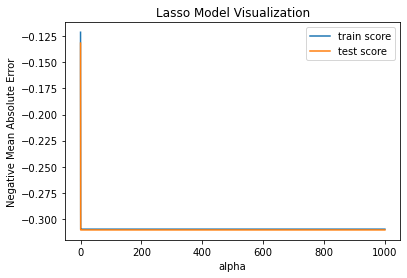

In [592]:
# Plot the mean test and train scores with alpha

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Lasso Model Visualization")
plt.legend(['train score','test score'], loc='best')
plt.show();

In [593]:

# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.12766964,  0.55051503,  0.4311309 ,  0.48842253,  0.39977911,
        0.12118204,  0.06520434,  0.1534925 ,  0.15821727,  0.28930668,
        0.14909197,  0.18573431,  0.12626098,  0.09325542, -0.19362965,
       -0.17094532,  0.29893659,  0.09492588, -0.09633196, -0.54170523,
        0.11074005,  0.07466763,  0.13853977, -0.        , -0.08462456,
        0.0880925 , -0.11414848, -0.12987083, -0.01845907,  0.28585317,
        0.07117237, -0.22151729, -0.11182391, -0.22760213, -0.22542788,
       -0.10468717,  0.09615204, -0.00133844,  0.13616239, -0.10283887,
       -0.16528294, -0.42163654, -0.09992116, -0.15483107, -0.13167998,
        0.10841571,  0.26342905, -0.07308994,  0.20418296, -0.10844388])

In [594]:

# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.03373513449466956

In [595]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 using training data is {}".format(r2_train_lr))

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 using test data is {}".format(r2_test_lr))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss using training data is {}".format(rss1_lr))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss using test data is {}".format(rss2_lr))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse using test data is {}".format(mse_train_lr))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse using test data is {}".format(mse_test_lr))

# Building list of all metrics
metric3 = []
metric3.append(r2_train_lr)
metric3.append(r2_test_lr)
metric3.append(rss1_lr)
metric3.append(rss2_lr)
metric3.append(mse_train_lr)
metric3.append(mse_train_lr)

r2 using training data is 0.8376254140616224
r2 using test data is 0.7816653503993877
rss using training data is 26.797434274467527
rss using test data is 14.775988908665267
mse using test data is 0.02624626275657936
mse using test data is 0.03373513449466956


In [596]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.838385,0.837625
1,R2 Score (Test),0.775039,0.781665
2,RSS (Train),26.672080,26.797434
3,RSS (Test),15.224402,14.775989
4,MSE (Train),0.026123,0.026246
5,MSE (Test),0.026123,0.026246


# Analying the Coefficients

In [597]:
betas = pd.DataFrame(index=X_train.columns)

In [598]:
betas.rows = X.columns

In [599]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [600]:
pd.set_option('display.max_rows', None)
betas.sort_values(by='Ridge',ascending=False)

,Ridge,Lasso
MSZoning_FV,0.565763,0.550515
MSZoning_RL,0.502327,0.488423
MSZoning_RH,0.446416,0.431131
MSZoning_RM,0.415755,0.399779
HouseStyle_2.5Fin,0.308545,0.298937
Foundation_Stone,0.308150,0.285853
Neighborhood_NoRidge,0.294062,0.289307
SaleType_ConLD,0.289356,0.263429
SaleType_New,0.276065,0.204183
Neighborhood_StoneBr,0.193620,0.185734


CONCLUION:
    1. Here we can see that Ridge performs better than Lasso 
    2. The top 5 variables which can be used for prediction are:-
        a. MSZoning_FV
        b. MSZoning_RL
        c. MSZoning_RH
        d. MSZoning_RM
        e. HouseStyle_2.5Fin
    3. The variables which negatively affect price are :-
        a. Exterior1st_BrkComm
        b. Functional_Maj2
        c. BsmtQual_TA
        d. BsmtQual_Fa
        e. Electrical_FuseP